<a href="https://colab.research.google.com/github/shivangpandya/Breast-Cancer-Detection/blob/master/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASE STUDY : BREAST CANCER CLASSIFICATION**

Predicting if the cancer is benign or malignant based on input:

30 set of features used such as:
1.Perimeter

2.Area

3.Compactness

4.Concavity

5. Smoothness

Number of instances:569
Class Dist : 212 - Malignant
357-Benign



## **STEP #1 IMPORTING THE DATASET**

In [1]:
!pip install -U seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
cancer = load_breast_cancer()

In [5]:
cancer

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [6]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [9]:
print(cancer['target_names'])

['malignant' 'benign']


In [10]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
cancer['data'].shape

(569, 30)

In [0]:
df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns = np.append(cancer['feature_names'],['target']))

In [13]:
df_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


# **STEP # 3 VISUALISING THE DATA**

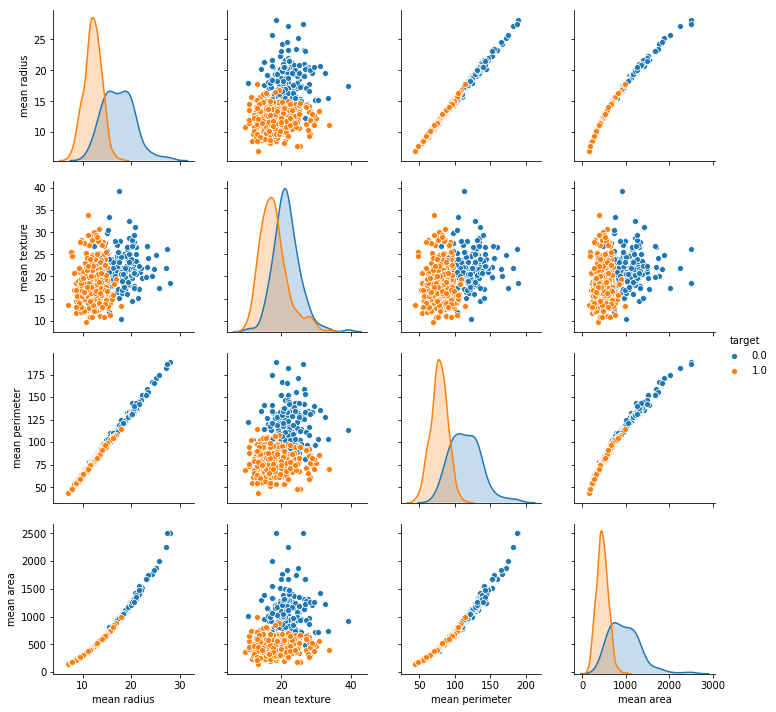

In [14]:
sns.pairplot(df_cancer ,hue = 'target' ,vars = ['mean radius' ,'mean texture', 'mean perimeter' ,'mean area'])

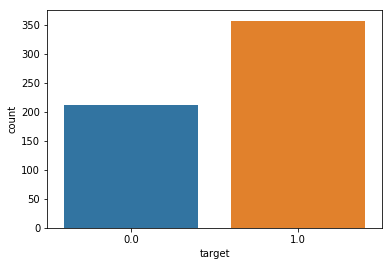

In [15]:
sns.countplot(df_cancer['target'])

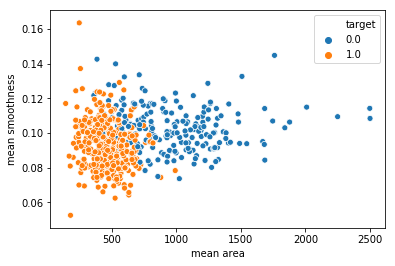

In [16]:
sns.scatterplot(x = 'mean area' , y = 'mean smoothness' , hue = 'target' , data = df_cancer)

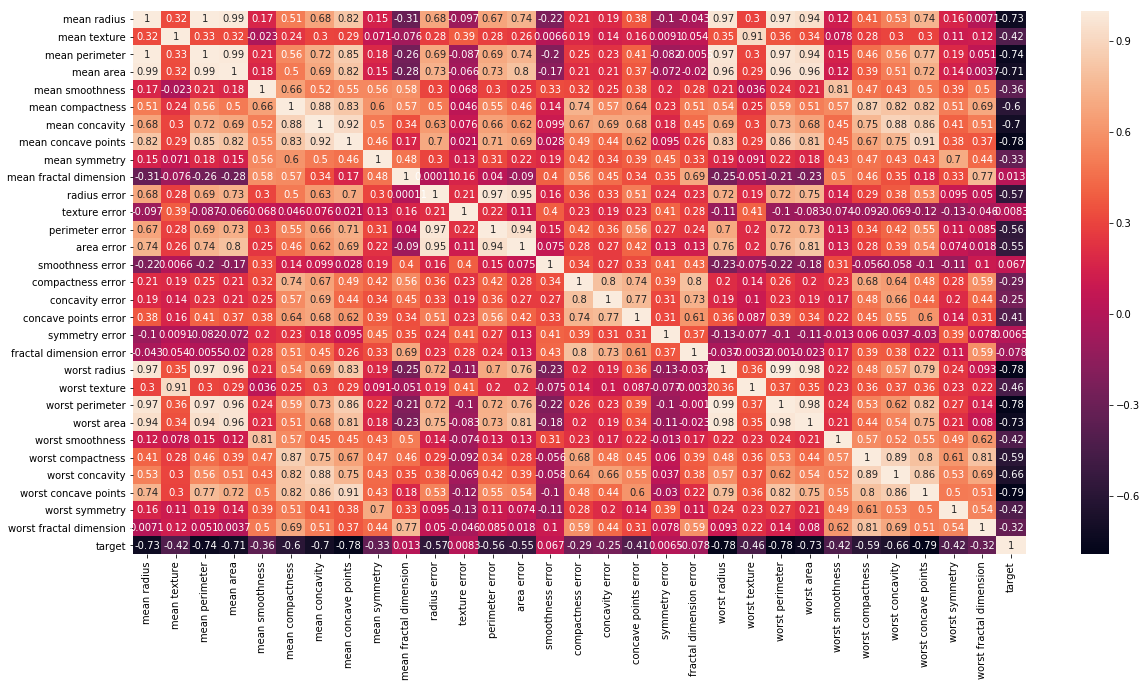

In [17]:
plt.figure(figsize = (20,10))
sns.heatmap(df_cancer.corr(), annot = True)

# **STEP # 4 MODEL TRAINING**

In [0]:
X = df_cancer.drop(['target'],axis = 1)

In [19]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


In [0]:
y = df_cancer['target']

In [21]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     1.0
21     1.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
539    1.0
540    1.0
541    1.0
542    1.0
543    1.0
544    1.0
545    1.0
546    1.0
547    1.0
548    1.0
549    1.0
550    1.0
551    1.0
552    1.0
553    1.0
554    1.0
555    1.0
556    1.0
557    1.0
558    1.0
559    1.0
560    1.0
561    1.0
562    0.0
563    0.0
564    0.0
565    0.0
566    0.0
567    0.0
568    1.0
Name: target, Length: 569, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state =  5)

In [24]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
306,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.410,20.45,92.00,636.9,0.11280,0.13460,0.01120,0.02500,0.2651,0.08385
410,11.360,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.021000,0.1601,0.05913,...,13.050,36.32,85.07,521.3,0.14530,0.16220,0.18110,0.08698,0.2973,0.07745
197,18.080,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,...,19.760,24.70,129.10,1228.0,0.08822,0.19630,0.25350,0.09181,0.2369,0.06558
376,10.570,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.059410,0.2188,0.08450,...,10.850,22.82,76.51,351.9,0.11430,0.36190,0.60300,0.14650,0.2597,0.12000
244,19.400,23.50,129.10,1155.0,0.10270,0.15580,0.204900,0.088860,0.1978,0.06000,...,21.650,30.53,144.90,1417.0,0.14630,0.29680,0.34580,0.15640,0.2920,0.07614
299,10.510,23.09,66.85,334.2,0.10150,0.06797,0.024950,0.018750,0.1695,0.06556,...,10.930,24.22,70.10,362.7,0.11430,0.08614,0.04158,0.03125,0.2227,0.06777
312,12.760,13.37,82.29,504.1,0.08794,0.07948,0.040520,0.025480,0.1601,0.06140,...,14.190,16.40,92.04,618.8,0.11940,0.22080,0.17690,0.08411,0.2564,0.08253
331,12.980,19.35,84.52,514.0,0.09579,0.11250,0.071070,0.029500,0.1761,0.06540,...,14.420,21.95,99.21,634.3,0.12880,0.32530,0.34390,0.09858,0.3596,0.09166
317,18.220,18.87,118.70,1027.0,0.09746,0.11170,0.113000,0.079500,0.1807,0.05664,...,21.840,25.00,140.90,1485.0,0.14340,0.27630,0.38530,0.17760,0.2812,0.08198
341,9.606,16.84,61.64,280.5,0.08481,0.09228,0.084220,0.022920,0.2036,0.07125,...,10.750,23.07,71.25,353.6,0.12330,0.34160,0.43410,0.08120,0.2982,0.09825


In [25]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
28,15.300,25.27,102.40,732.4,0.10820,0.16970,0.168300,0.087510,0.1926,0.06540,...,20.270,36.71,149.30,1269.0,0.16410,0.61100,0.633500,0.20240,0.4027,0.09876
163,12.340,22.22,79.85,464.5,0.10120,0.10150,0.053700,0.028220,0.1551,0.06761,...,13.580,28.68,87.36,553.0,0.14520,0.23380,0.168800,0.08194,0.2268,0.09082
123,14.500,10.89,94.28,640.7,0.11010,0.10990,0.088420,0.057780,0.1856,0.06402,...,15.700,15.98,102.80,745.5,0.13130,0.17880,0.256000,0.12210,0.2889,0.08006
361,13.300,21.57,85.24,546.1,0.08582,0.06373,0.033440,0.024240,0.1815,0.05696,...,14.200,29.20,92.94,621.2,0.11400,0.16670,0.121200,0.05614,0.2637,0.06658
549,10.820,24.21,68.89,361.6,0.08192,0.06602,0.015480,0.008160,0.1976,0.06328,...,13.030,31.45,83.90,505.6,0.12040,0.16330,0.061940,0.03264,0.3059,0.07626
339,23.510,24.27,155.10,1747.0,0.10690,0.12830,0.230800,0.141000,0.1797,0.05506,...,30.670,30.73,202.40,2906.0,0.15150,0.26780,0.481900,0.20890,0.2593,0.07738
286,11.940,20.76,77.87,441.0,0.08605,0.10110,0.065740,0.037910,0.1588,0.06766,...,13.240,27.29,92.20,546.1,0.11160,0.28130,0.236500,0.11550,0.2465,0.09981
354,11.140,14.07,71.24,384.6,0.07274,0.06064,0.045050,0.014710,0.1690,0.06083,...,12.120,15.82,79.62,453.5,0.08864,0.12560,0.120100,0.03922,0.2576,0.07018
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.145000,0.063000,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.321900,0.11080,0.2827,0.09208
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.080920,0.028000,0.1422,0.05823,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.330800,0.08978,0.2048,0.07628


In [0]:
from sklearn.svm import SVC

In [0]:
from sklearn.metrics import classification_report , confusion_matrix

In [0]:
svc_model = SVC()

In [29]:
svc_model.fit(X_train , y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# **STEP # 5 EVALUATING THE MODEL**

In [0]:
y_predict = svc_model.predict(X_test)

In [31]:
y_predict

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [0]:
cm = confusion_matrix(y_test ,y_predict)

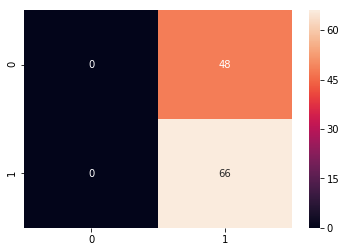

In [33]:
sns.heatmap(cm , annot = True)

# **STEP # 5 IMPROVING THE MODEL**

In [0]:
min_train = X_train.min()

In [0]:
range_train = (X_train - min_train).max()

In [0]:
X_train_scaled = (X_train - min_train)/range_train

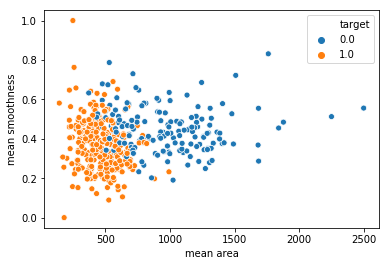

In [37]:
sns.scatterplot(x = X_train['mean area'], y =X_train_scaled['mean smoothness'] , hue = y_train)

In [0]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test) / range_test

In [39]:
svc_model.fit(X_train_scaled , y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [0]:
 y_predict = svc_model.predict(X_test_scaled)

In [0]:
cm = confusion_matrix(y_test , y_predict)

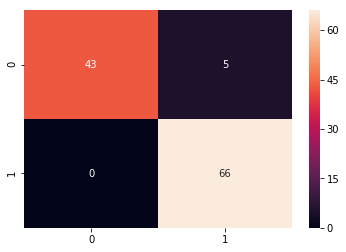

In [42]:
sns.heatmap(cm , annot = True)

In [43]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        48
         1.0       0.93      1.00      0.96        66

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# **IMPROVING MODEL-PART 2**

In [0]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001] , 'kernel':['rbf']}

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
grid = GridSearchCV(SVC() , param_grid , refit = True , verbose = 4)

In [49]:
grid.fit(X_train_scaled , y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9671052631578947, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9210526315789473, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9470198675496688, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9144736842105263, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8881578947368421, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8675496688741722, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ............................

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [51]:
grid.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [0]:
grid_predictions = grid.predict(X_test_scaled)

In [0]:
cm = confusion_matrix(y_test , grid_predictions)

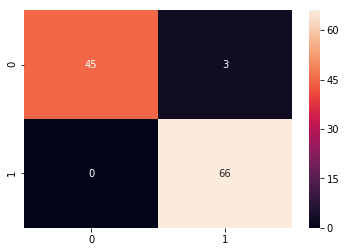

In [54]:
sns.heatmap(cm , annot = True)

In [55]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        48
         1.0       0.93      1.00      0.96        66

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

